# Meet the Course Applicants

**Goal:** To get a better sense of what kind of people sign up for Applied Data Science Lab — where they're from, how old are they, what have they previously studied, and more.

- Extract and transform applicant demographic information using PyMongo.
- Enrich demographic information using an open-source library.
- Create a choropleth map to visualize nationality.
- Build a sorting function to visualize education level.

In [1]:
from pprint import PrettyPrinter
import kaleido
import pandas as pd
import plotly.express as px
from country_converter import CountryConverter
from pymongo import MongoClient

Instantiate PrettyPrinter

In [2]:
pp = PrettyPrinter(indent=2)
print("pp type:", type(pp))

pp type: <class 'pprint.PrettyPrinter'>


Connect to MongoDB Client

In [3]:
client = MongoClient(host="localhost",port=27017)
print("client type:", type(client))

client type: <class 'pymongo.mongo_client.MongoClient'>


Explore

Country Converter: Open-Source Software

In [4]:
df_nationality = pd.read_csv("data/df_nationality.csv")
df_nationality.head()

,Unnamed: 0,country_iso2,count
0,138,DM,1
1,51,BA,1
2,54,MO,1
3,35,CR,1
4,74,PT,1


In [5]:
cc = CountryConverter()
df_nationality["country_name"] = cc.convert(df_nationality["country_iso2"], to="name_short")

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

nan not found in ISO3


df_nationality shape: (139, 4)


,Unnamed: 0,country_iso2,count,country_name
0,138,DM,1,Dominica
1,51,BA,1,Bosnia and Herzegovina
2,54,MO,1,Macau
3,35,CR,1,Costa Rica
4,74,PT,1,Portugal


Applicants Nationality Bar Chart

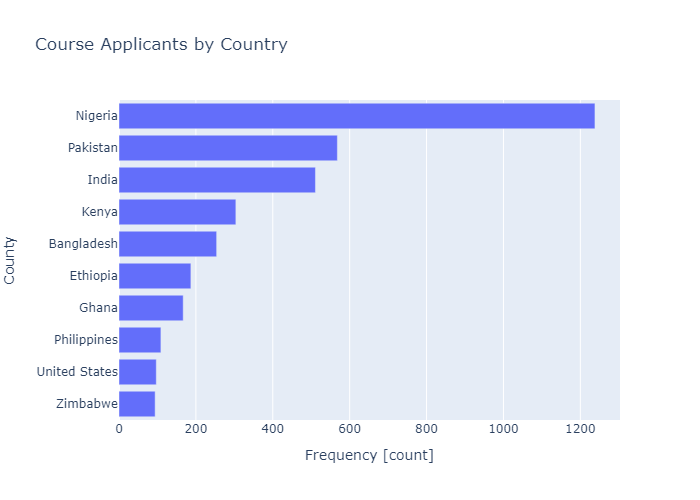

In [33]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10),
    x="count",
    y="country_name",
    orientation="h",
    title="Course Applicants by Country"
)
# Set axis labels
fig.update_layout(xaxis_title="Frequency [count]", yaxis_title="County")
fig.show("png")

Normalize Nationality

In [7]:
df_nationality["count_pct"] = (df_nationality["count"]/df_nationality["count"].count()) * 100

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (139, 5)


,Unnamed: 0,country_iso2,count,country_name,count_pct
0,138,DM,1,Dominica,0.719424
1,51,BA,1,Bosnia and Herzegovina,0.719424
2,54,MO,1,Macau,0.719424
3,35,CR,1,Costa Rica,0.719424
4,74,PT,1,Portugal,0.719424


Normalized Nationality Bar Chart

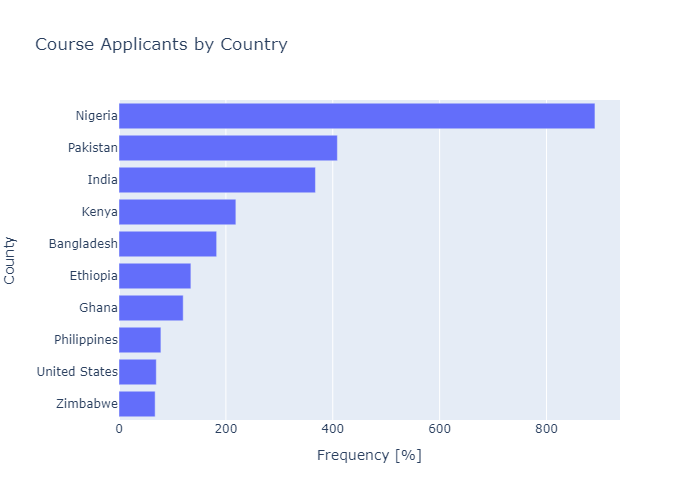

In [32]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10),
    x="count_pct",
    y="country_name",
    orientation="h",
    title="Course Applicants by Country"
)
# Set axis labels
fig.update_layout(xaxis_title="Frequency [%]", yaxis_title="County")
# fig.show("png")
fig.show("png")

Country Converter: Take Two

In [9]:
df_nationality["country_iso3"] = cc.convert(df_nationality["country_iso2"], to="ISO3")

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

nan not found in ISO3


df_nationality shape: (139, 6)


,Unnamed: 0,country_iso2,count,country_name,count_pct,country_iso3
0,138,DM,1,Dominica,0.719424,DMA
1,51,BA,1,Bosnia and Herzegovina,0.719424,BIH
2,54,MO,1,Macau,0.719424,MAC
3,35,CR,1,Costa Rica,0.719424,CRI
4,74,PT,1,Portugal,0.719424,PRT


Choropleth Map

nat_fig type: <class 'plotly.graph_objs._figure.Figure'>


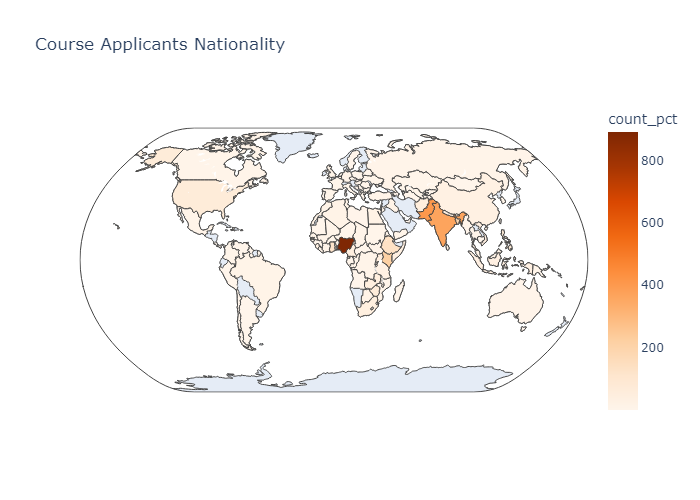

In [34]:
def build_nat_choropleth():
    fig = px.choropleth(
        data_frame=df_nationality,
        locations="country_iso3",
        color="count_pct",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Oranges,
        title="Course Applicants Nationality"
    )
    return fig


nat_fig = build_nat_choropleth()
print("nat_fig type:", type(nat_fig))
nat_fig.show("png");

Age

In [11]:
ages=pd.read_csv("data/ages.csv")
ages.head()

,_id,years
0,6525d787953844722c8383f8,26
1,6525d787953844722c8383f9,25
2,6525d787953844722c8383fa,30
3,6525d787953844722c8383fb,40
4,6525d787953844722c8383fc,34


In [12]:
ages = ages["years"]
ages.head()

0    26
1    25
2    30
3    40
4    34
Name: years, dtype: int64

Applicant Age Histogram

age_fig type: <class 'plotly.graph_objs._figure.Figure'>


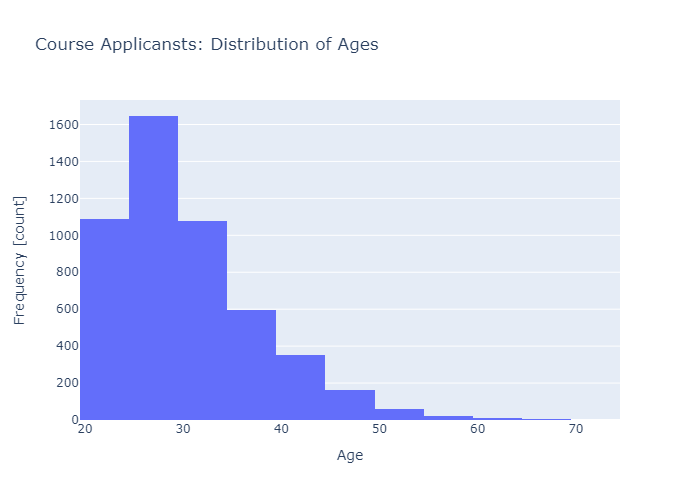

In [37]:
def build_age_hist():
    # Create histogram of `ages`
    fig = px.histogram(
        x=ages, 
        nbins=20,
        title="Course Applicansts: Distribution of Ages"
    )
    # Set axis labels
    fig.update_layout(xaxis_title="Age", yaxis_title="Frequency [count]")
    return fig

age_fig = build_age_hist()
print("age_fig type:", type(age_fig))
age_fig.show("png");

-  Most of our applicants are in their twenties, but we also have applicants in their 70s.

Education: Applicants by education level

In [23]:
education=pd.read_csv("data/education.csv").set_index("highest_degree_earned")
education.head()

,count
highest_degree_earned,
Doctorate (e.g. PhD),76
Bachelor's degree,2643
High School or Baccalaureate,832
Some College (1-3 years),612
Master's degree,862


Set Index for education

In [28]:
education = education.squeeze()
education.head()

highest_degree_earned
High School or Baccalaureate     832
Some College (1-3 years)         612
Bachelor's degree               2643
Master's degree                  862
Doctorate (e.g. PhD)              76
Name: count, dtype: int64

Sort Education

In [25]:
def ed_sort(counts):
    """Sort array `counts` from highest to lowest degree earned."""
    degrees = [
        "High School or Baccalaureate",
        "Some College (1-3 years)",
        "Bachelor's degree",
        "Master's degree",
        "Doctorate (e.g. PhD)",
    ]
    mapping = {k: v for v, k in enumerate(degrees)}
    sort_order = [mapping[c] for c in counts]
    return sort_order


education.sort_index(key=ed_sort, inplace=True)
education

highest_degree_earned
High School or Baccalaureate     832
Some College (1-3 years)         612
Bachelor's degree               2643
Master's degree                  862
Doctorate (e.g. PhD)              76
Name: count, dtype: int64

Plot: Education Level bar Chart

ed_fig type: <class 'plotly.graph_objs._figure.Figure'>


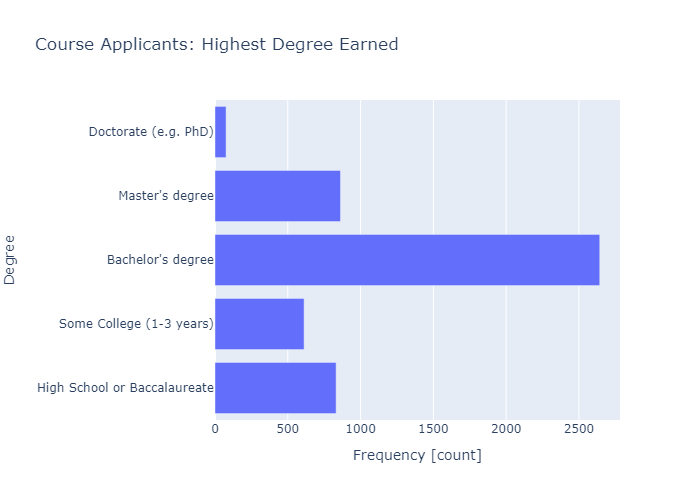

In [29]:
def build_ed_bar():
    # Create bar chart
    fig = px.bar(
        x=education,
        y=education.index,
        orientation="h",
        title="Course Applicants: Highest Degree Earned"
    )
    # Add axis labels
    fig.update_layout(xaxis_title="Frequency [count]", yaxis_title="Degree")
    return fig


ed_fig = build_ed_bar()
print("ed_fig type:", type(ed_fig))
ed_fig.show("png");

- Majority of the applicants have Bachelor's degree.